In [1]:
import sys
sys.path.append("../Modules/")
sys.path.append("../")
import os

import pandas as pd
import numpy as np

from configobj import ConfigObj
from configobj import flatten_errors
from validate import Validator
    
import logging

#fmt = 'logging.Formatter(''%(levelname)s_%(name)s-%(funcName)s(): - %(message)s'
fmt = '%(levelname)s_%(name)s-%(funcName)s(): - %(message)s'
logging.basicConfig(level=logging.INFO, format=fmt)
logger = logging.getLogger(__name__)


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
#notebook

In [3]:
allTrialData = pd.read_pickle('../allTrialData.pickle')


In [4]:
def removeOutliers(allTrialData,columnName,stdRange=3):
    outliers = np.abs(allTrialData[columnName]-allTrialData[columnName].mean()) > (stdRange*allTrialData[columnName].std())
    allTrialData[columnName] = allTrialData[columnName].mask(outliers)
    return allTrialData

In [5]:
allTrialData = removeOutliers(allTrialData,'catchingError',stdRange=2.5)
allTrialData = removeOutliers(allTrialData,'normLocInWindow',stdRange=2.5)

# Create an array for matlabby averaging across dimensions 

### Calculate percent caught

In [6]:

fixDf_ipd_bl_sub = allTrialData.groupby(['ipdRatio',
                                          'blockNumber',
                                          'fileName'])

k = fixDf_ipd_bl_sub['ballCaughtQ'].groups.keys()
nReps = len(fixDf_ipd_bl_sub['ballCaughtQ'].get_group(k[0]))


allTrialData.groupby(['ipdRatio','blockNumber']).groups.keys()
pctCaught_ipd_passLoc_bl_sub = fixDf_ipd_bl_sub['ballCaughtQ'].agg(np.sum)/nReps*100
pctCaught_ipd_passLoc_bl_sub[0.5,2]

fileName
exp_data-2019-4-25-11-22     96.666667
exp_data-2019-4-26-13-4      86.666667
exp_data-2019-4-26-8-52      96.666667
exp_data-2019-4-29-13-18    100.000000
Name: ballCaughtQ, dtype: float64

In [7]:
fixDf_ipd_passLoc_bl_sub = allTrialData.groupby(['ipdRatio',
                                                  'passingLocX',
                                                  'blockNumber',
                                                  'fileName'])


ipdRatioList = list(np.sort(allTrialData.groupby('ipdRatio').groups.keys()))
passingLocXList = list(np.sort(allTrialData.groupby('passingLocX').groups.keys()))
blockList = list(allTrialData.groupby('blockNumber').groups.keys())
fileNames = list(allTrialData.groupby('fileName').groups.keys())

numIpd = len(ipdRatioList)
numPassingLoc = len(passingLocXList)
numBlock = len(blockList)
numSub = len(fileNames)

catchErr_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])
stdCatchErr_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])

catchErrX_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])
stdCatchErrX_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])

catchErrY_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])
stdCatchErrY_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])

pctCaught_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])

fileNames_sub = []
for (ipd,pLoc,bl,sub), data in fixDf_ipd_passLoc_bl_sub:
    # Iterate through groups, while keeping track of which group we're in.
    # The tuple (ipd,pLoc,bl,sub) contains the group indices
    # The variable data is a dataframe containing rows in that group 
    
    # Convert group indices to numeric indices into their value lists
    # ...what is the index of a ipd of 0.5 in the ipdRatioList?
    ipdIdx  = [i for i, s in enumerate(ipdRatioList) if ipd == s]
    plocIdx  = [i for i, s in enumerate(passingLocXList) if pLoc == s]  
    blIdx  = [i for i, s in enumerate(blockList) if bl == s]
    subIdx  = [i for i, s in enumerate(fileNames) if sub == s]


    catchErr_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data[('catchingError','2D')].mean()
    stdCatchErr_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data[('catchingError','2D')].std()
    
    catchErrX_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data[('catchingError','X')].mean()
    stdCatchErrX_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data[('catchingError','X')].std()

    catchErrY_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data[('catchingError','Y')].mean()
    stdCatchErrY_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data[('catchingError','Y')].std()
    
    nReps = float(len(data['ballCaughtQ']))
    pctCaught_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data['ballCaughtQ'].sum()/nReps*100.0

    #stdCatchErr_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data[('catchingError','2D')].std()


#  2D error by gaze index

In [8]:
#fixDf_trial_block_sub = allTrialData.groupby(('subjectNumber','trialNumber','blockNumber'))

fixDf_ipd_passLoc_bl_sub = allTrialData.groupby(['ipdRatio',
                                                  'passingLocX',
                                                  'blockNumber',
                                                  'fileName'])

ipdRatioList = list(np.sort(allTrialData.groupby('ipdRatio').groups.keys()))
passingLocXList = list(np.sort(allTrialData.groupby('passingLocX').groups.keys()))
blockList = list(allTrialData.groupby('blockNumber').groups.keys())
fileNames = list(allTrialData.groupby('fileName').groups.keys())

numIpd = len(ipdRatioList)
numPassingLoc = len(passingLocXList)
numBlock = len(blockList)
numSub = len(fileNames)

# Initialize to an array of zeros 
constantVelModel_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])
observed_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])
normLocInWindow_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])
modelToModelDist_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])

stdConstantVelModel_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])
stdObserved_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])
stdNormLocInWindow_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])
stdModelToModelDist_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])

catchErr_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])
stdCatchErr_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])

catchErrX_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])
stdCatchErrX_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])

catchErrY_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])
stdCatchErrY_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])

pctCaught_ipd_pass_bl_sub = np.zeros([numIpd,numPassingLoc,numBlock, numSub])

fileNames_sub = []
for (ipd,pLoc,bl,sub), data in fixDf_ipd_passLoc_bl_sub:
    # Iterate through groups, while keeping track of which group we're in.
    # The tuple (ipd,pLoc,bl,sub) contains the group indices
    # The variable data is a dataframe containing rows in that group 
    
    # Convert group indices to numeric indices into their value lists
    # ...what is the index of a ipd of 0.5 in the ipdRatioList?
    ipdIdx  = [i for i, s in enumerate(ipdRatioList) if ipd == s]
    plocIdx  = [i for i, s in enumerate(passingLocXList) if pLoc == s]  
    blIdx  = [i for i, s in enumerate(blockList) if bl == s]
    subIdx  = [i for i, s in enumerate(fileNames) if sub == s]


    constantVelModel_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data['velPredError'].mean()
    observed_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data['observedError'].mean()
    normLocInWindow_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data['normLocInWindow'].mean()
    modelToModelDist_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data['modelToModelDist'].mean() 

    stdConstantVelModel_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data['velPredError'].std()
    stdObserved_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data['observedError'].std()
    stdNormLocInWindow_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data['normLocInWindow'].mean() 
    stdModelToModelDist_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data['modelToModelDist'].mean()
    
    catchErr_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data[('catchingError','2D')].mean()
    stdCatchErr_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data[('catchingError','2D')].std()
    
    catchErrX_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data[('catchingError','X')].mean()
    stdCatchErrX_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data[('catchingError','X')].std()

    catchErrY_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data[('catchingError','Y')].mean()
    stdCatchErrY_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data[('catchingError','Y')].std()
    
    nReps = float(len(data['ballCaughtQ']))
    pctCaught_ipd_pass_bl_sub[ipdIdx,plocIdx,blIdx,subIdx]  = data['ballCaughtQ'].sum()/nReps*100.0

# Catching err individual subs

In [9]:
fixDf_ipd_bl_sub = allTrialData.groupby(['ipdRatio',
                                          'blockNumber',
                                          'fileName'])

k = fixDf_ipd_bl_sub['ballCaughtQ'].groups.keys()
nReps = len(fixDf_ipd_bl_sub['ballCaughtQ'].get_group(k[0]))


allTrialData.groupby(['ipdRatio','blockNumber']).groups.keys()
pctCaught_ipd_passLoc_bl_sub = fixDf_ipd_bl_sub['ballCaughtQ'].agg(np.sum)/nReps*100
pctCaughtB2NoExp_fileName = pctCaught_ipd_passLoc_bl_sub[1,2]
pctCaughtB2NoExp_fileName

fileName
exp_data-2019-4-25-11-22    96.666667
exp_data-2019-4-26-13-4     90.000000
exp_data-2019-4-26-8-52     90.000000
exp_data-2019-4-29-13-18    93.333333
Name: ballCaughtQ, dtype: float64

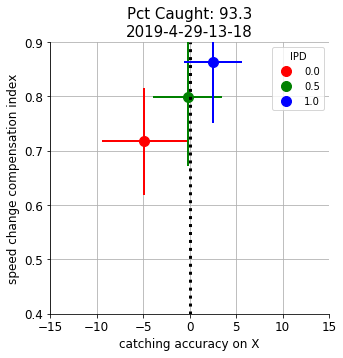

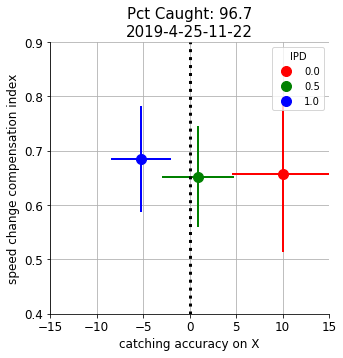

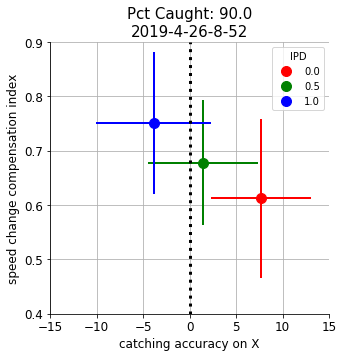

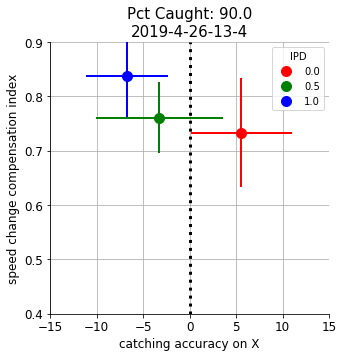

In [14]:
fileTimeList = [];
[fileTimeList.append(name) for name in os.listdir("../Data/") if name[0] is not '.'];

gb_sub_block = allTrialData.groupby(['subjectNumber','blockNumber'])
for subIdx in range(len(np.unique(allTrialData['subjectNumber']))):

    p, ax = plt.subplots(1, 1) #sharey=True)

    cList = ['r','g','b','c','y']
    offsets = np.linspace(-.02,.02,6)
    
    # Block 2
    gb_ipd = gb_sub_block.get_group((subIdx,2)).groupby(['ipdRatio'])
    count = 0
    for gVal, data in gb_ipd:

        y = data['normLocInWindow'].mean()
        x = data[('catchingError','X')].mean()*100
        
        h = ax.scatter(x=x,y=y,
                   s=100,facecolors=cList[count],edgecolors=cList[count])

        yerr = data['normLocInWindow'].std()
        xerr = data[('catchingError','X')].std()*100

#         h = ax.scatter(x, y,linewidth=2,color = cList[count])
        ax.errorbar(x =x, y=y, 
            xerr = xerr,yerr= yerr,
            elinewidth=2,
            ecolor = cList[count],fmt="none")

        h.set_label(gVal)
        count = count+1
        
    plt.gcf().set_size_inches(5,5)
    pctCaught = pctCaughtB2NoExp_fileName['exp_data-' + str(fileTimeList[subIdx])]
    titleStr = 'Pct Caught: {0:.1f}\n{1:}'.format(pctCaught,fileTimeList[subIdx])
    ax.axes.set_title(titleStr, fontsize=15)
    
    ax.set_ylabel('speed change compensation index', fontsize=12)
    ax.set_xlabel('catching accuracy on X', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)

    ax.set_ylim([.4,.9])
#     ax.set_ylim([-.15,.1])
    ax.set_xlim([-15,15])
    ax.axvline(0, c='k',ls=':',lw=3)
    
    ax.axes.spines['top'].set_visible(False)
    ax.axes.spines['right'].set_visible(False)
    ax.axes.yaxis.grid(True)
    ax.axes.xaxis.grid(True)
    ax.axes.set_axisbelow(True)
    
    plt.rcParams["font.family"] = "sans-serif"

    plt.legend(title='IPD')
    ax.tick_params(axis='both', which='major', labelsize=12)

    p.set_facecolor('w')
    outDir = '../subFigs/'
    if not os.path.exists(outDir):
        os.makedirs(outDir)
    fName = outDir + 'sci_by_distance-' + fileTimeList[subIdx] + '.png'
    plt.savefig(fName, facecolor=p.get_facecolor(), transparent=True)


# Means

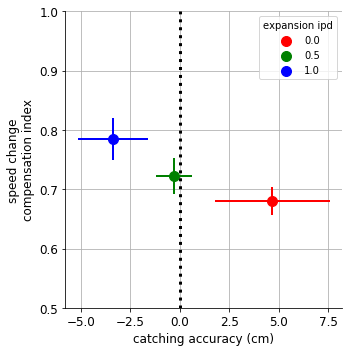

In [11]:
fileTimeList = [];
[fileTimeList.append(name) for name in os.listdir("../Data/") if name[0] is not '.'];


##############
nSubs = np.shape(catchErr_ipd_pass_bl_sub)[3]

catchErrX_ipd_bl_sub = np.mean(catchErrX_ipd_pass_bl_sub,1)
meanCatchErrX_ipd_bl = np.mean(catchErrX_ipd_bl_sub,2)
stdCatchErrX_ipd_bl = np.std(catchErrX_ipd_bl_sub,2) / np.sqrt(nSubs)

normLocInWindow_ipd_bl_sub = np.mean(normLocInWindow_ipd_pass_bl_sub,1)
meanNormLocInWindow_ipd_bl = np.mean(normLocInWindow_ipd_bl_sub,2)
stdNormLocInWindow_ipd_bl = np.std(normLocInWindow_ipd_bl_sub,2) / np.sqrt(nSubs)

# normLocInWindow_ipd_pass_bl = np.squeeze(normLocInWindow_ipd_pass_bl_sub[:,:,:,subIdx])
# normLocInWindow_ipd_bl = np.mean(normLocInWindow_ipd_pass_bl,1)

p, ax = plt.subplots(1, 1) #sharey=True)

cList = ['r','g','b','c','y']
offsets = np.linspace(-.02,.02,6)

# Block 2
# gb_ipd = gb_sub_block.get_group((subIdx,2)).groupby(['ipdRatio'])
count = 0
for gIdx, gVal in enumerate(ipdRatioList):

    x = meanCatchErrX_ipd_bl[gIdx,1]*100
    xerr = stdCatchErrX_ipd_bl[gIdx,1]*100
    y = meanNormLocInWindow_ipd_bl[gIdx,1]
    yerr = stdNormLocInWindow_ipd_bl[gIdx,1]

    h = ax.scatter(x=x,y=y,
               s=100,facecolors=cList[count],edgecolors=cList[count])

    ax.errorbar(x =x, y=y, 
        xerr = xerr,yerr= yerr,
        elinewidth=2,
        ecolor = cList[count],fmt="none")

    h.set_label(gVal)
    
    ### SHow individual data points
#     h = ax.scatter(y=normLocInWindow_ipd_bl_sub[gIdx,1,:],
#                    x=catchErrX_ipd_bl_sub[gIdx,1,:]*100,
#                    s=30,facecolors=cList[count],edgecolors=cList[count])
    count = count+1

plt.gcf().set_size_inches(5,5)


ax.set_xlabel('catching accuracy (cm)', fontsize=12)
ax.set_ylabel('speed change\ncompensation index', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=14)

# ax.set_ylim([0,1])
ax.set_ylim([0.5,1])
#ax.set_ylim([0,1])
ax.axes.spines['top'].set_visible(False)
ax.axes.spines['right'].set_visible(False)
ax.axes.yaxis.grid(True)
ax.axes.xaxis.grid(True)
ax.axes.set_axisbelow(True)

plt.rcParams["font.family"] = "sans-serif"
ax.axvline(0, c='k',ls=':',lw=3)

plt.legend(title='expansion ipd')
ax.tick_params(axis='both', which='major', labelsize=12)

p.set_facecolor('w')
outDir = '../subFigs/'
if not os.path.exists(outDir):
    os.makedirs(outDir)
fName = outDir + 'meanSci_by_distance.png'
plt.tight_layout()
plt.savefig(fName, facecolor=p.get_facecolor(), transparent=True)

# all trials

Text(0,0.5,'speed change\ncompensation index')

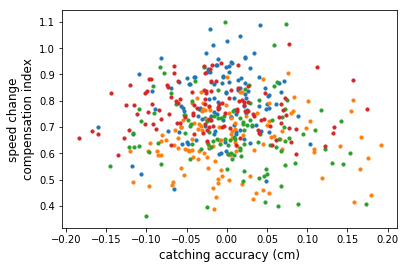

In [12]:
list(allTrialData)
gbSub = allTrialData.groupby('subjectNumber')

p, ax = plt.subplots(1, 1) #sharey=True)

for data in gbSub:
    x = data[1][('catchingError','X')]
    y = data[1]['normLocInWindow']
    h = ax.scatter(x=x,y=y,s=10)#,facecolors=data['subjectNumber'])#cList[count],edgecolors=cList[count])

ax.set_xlabel('catching accuracy (cm)', fontsize=12)
ax.set_ylabel('speed change\ncompensation index', fontsize=12)

In [13]:
# fileTimeList = [];
# [fileTimeList.append(name) for name in os.listdir("../Data/") if name[0] is not '.'];


# ##############
# nSubs = np.shape(catchErr_ipd_pass_bl_sub)[3]

# catchErrX_ipd_bl_sub = np.mean(catchErrX_ipd_pass_bl_sub,1)
# meanCatchErrX_ipd_bl = np.mean(catchErrX_ipd_bl_sub,2)
# stdCatchErrX_ipd_bl = np.std(catchErrX_ipd_bl_sub,2) / np.sqrt(nSubs)

# normLocInWindow_ipd_bl_sub = np.mean(normLocInWindow_ipd_pass_bl_sub,1)
# meanNormLocInWindow_ipd_bl = np.mean(normLocInWindow_ipd_bl_sub,2)
# stdNormLocInWindow_ipd_bl = np.std(normLocInWindow_ipd_bl_sub,2) / np.sqrt(nSubs)

# # normLocInWindow_ipd_pass_bl = np.squeeze(normLocInWindow_ipd_pass_bl_sub[:,:,:,subIdx])
# # normLocInWindow_ipd_bl = np.mean(normLocInWindow_ipd_pass_bl,1)

# p, ax = plt.subplots(1, 1) #sharey=True)

# cList = ['r','g','b','c','y']
# offsets = np.linspace(-.02,.02,6)

# # Block 2
# # gb_ipd = gb_sub_block.get_group((subIdx,2)).groupby(['ipdRatio'])
# count = 0
# for gIdx, gVal in enumerate(ipdRatioList):

#     x = meanCatchErrX_ipd_bl[gIdx,1]*100
#     xerr = stdCatchErrX_ipd_bl[gIdx,1]*100
#     y = meanNormLocInWindow_ipd_bl[gIdx,1]
#     yerr = stdNormLocInWindow_ipd_bl[gIdx,1]

#     h = ax.scatter(x=x,y=y,
#                s=100,facecolors=cList[count],edgecolors=cList[count])

#     ax.errorbar(x =x, y=y, 
#         xerr = xerr,yerr= yerr,
#         elinewidth=2,
#         ecolor = cList[count],fmt="none")

#     h.set_label(gVal)
    
#     ### SHow individual data points
# #     h = ax.scatter(y=normLocInWindow_ipd_bl_sub[gIdx,1,:],
# #                    x=catchErrX_ipd_bl_sub[gIdx,1,:]*100,
# #                    s=30,facecolors=cList[count],edgecolors=cList[count])
#     count = count+1

# plt.gcf().set_size_inches(5,5)


# ax.set_xlabel('catching accuracy (cm)', fontsize=12)
# ax.set_ylabel('speed change\ncompensation index', fontsize=12)

# ax.tick_params(axis='both', which='major', labelsize=14)

# # ax.set_ylim([0,1])
# ax.set_ylim([0.5,1])
# #ax.set_ylim([0,1])
# ax.axes.spines['top'].set_visible(False)
# ax.axes.spines['right'].set_visible(False)
# ax.axes.yaxis.grid(True)
# ax.axes.xaxis.grid(True)
# ax.axes.set_axisbelow(True)

# plt.rcParams["font.family"] = "sans-serif"
# ax.axvline(0, c='k',ls=':',lw=3)

# plt.legend(title='expansion ipd')
# ax.tick_params(axis='both', which='major', labelsize=12)

# p.set_facecolor('w')
# outDir = '../subFigs/'
# if not os.path.exists(outDir):
#     os.makedirs(outDir)
# fName = outDir + 'meanSci_by_distance.png'
# plt.tight_layout()
# plt.savefig(fName, facecolor=p.get_facecolor(), transparent=True)